**CS 4099: ST: Graph Machine Learning**

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and to delete the line `raise NotImplementedError()` (which are included to remind you in case you forget to solve one of the coding questions).

Do not forget to include your name below:

In [4]:
NAME = "Phong Cao"

---

# CS4099: Colab 2

<font color='fucsia'>DUE: 11:59pm ET Thursday February 13</font>

# Network Models (9 questions + 4 ISU only)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter

## The $G(n,p)$ model

The $G(n,p)$ model -- a.k.a. Erdős–Rényi model -- can exhbit two of the non-trivial properties discussed above, when adequately parameterized:
-  short distances and
-  the giant component.

Let's look at these two properties for graphs generated from $G(n,p)$ with the same number of nodes ($n=10,697$) and edges ($m=31,992$) as the AS graph in the slides.

In [6]:
n = 10697
m = 31992

# compute p and the average degree z
p = m/(n*(n-1)/2)
z = 2*m/n   # this is more precise than z = p*(n-1)

print(f"p = {p:.1e}, z = {z:.3f}")

p = 5.6e-04, z = 5.981


The theory states that, when $z > 1$, the average distance is $O(\log n/\log z)$. Note that this doesn't account for constants, but rather tell us tha tthe average distance grows no faster than $\log n/\log z$.

In [7]:
print(f'log n / log z = {np.log(n)/np.log(z):.3f}')

log n / log z = 5.187


Let's generate a synthetic network that has the same number of nodes and edges.

Q1. Generate one network `G` from the $G(n,p)$ model using the parameters above. You are allowed to use functions from `networkx`.

In [8]:
np.random.seed(123)

In [9]:
# A1. (1 line)
# YOUR CODE HERE

# Generate a random graph using the G(n, p) model
G = nx.erdos_renyi_graph(n, p, seed=42)

Q2. Get the size `max_size` (in number of nodes) of the largest connected component in G.

In [10]:
# A2. (~2-6 lines)

# YOUR CODE HERE
# Find the largest connected component in G
largest_cc = max(nx.connected_components(G), key=len)
max_size = len(largest_cc)

max_size


10668



Q3. So, would you say that this graph has a giant component? Did you expect this to be the case? Why?

Yes the largest components contain 10668 nodes in 10697 nodes which is almost of the total nodes available. Yes, I did expect this because with z > 1, the G(n, p) has a giant component. In this case z = 5.981 which is much more than 1 so it have a giant component. This is the supercritical regiem case.

Q4. We now want to study the distribution of distances in the graph. Since some nodes are unreachable, let's focus on the largest connected component (LCC). One issue is that, depending on number of nodes in the LCC, computing the distance between all pairs can be very expensive.

Instead, sample a bunch `nbunch` of 100 nodes from the LCC containing only 5 nodes. Next, compute the distances between each node in `nbunch` and all the other nodes in the LCC, saving the results to `all_dist`.

In [11]:
# A4. (~5-6 lines)
# YOUR CODE HERE
import random

# Sample 100 nodes from the LCC
nbunch = random.sample(sorted(largest_cc), 100)

# Compute shortest path lengths from each sampled node to all other nodes in LCC
all_dist = {node: nx.single_source_shortest_path_length(G, node) for node in nbunch}
all_dist = [dist for dists in all_dist.values() for dist in dists.values()]

all_dist

[0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [12]:
print(f"The average distance is {np.mean(all_dist):.3f}") # is this close to what the theory suggests?

The average distance is 5.426


Below we compute the empirical pmf (probability mass function) of distances in the LCC, storing the distance values in `dist` and the respective relative frequencies in `prob`.

Average distance: 5.426


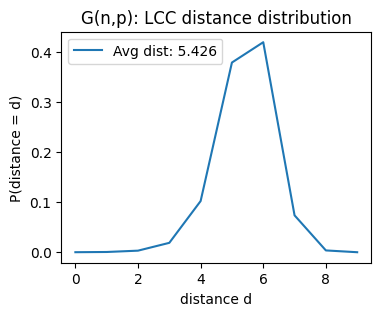

In [13]:
# get distance distribution
dist_count = Counter(all_dist)
dist, cnt = zip(*dist_count.items())

# convert counts to probability (relative frequency)
prob = np.array(cnt) / len(all_dist)

# compute average
avg_dist = np.sum(np.array(dist) * prob)
print(f"Average distance: {avg_dist:.3f}")

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(dist, prob, label=f'Avg dist: {avg_dist:.3f}') # nicer to plot lines than points here
ax.set_title("G(n,p): LCC distance distribution")
ax.set_ylabel("P(distance = d)")
ax.set_xlabel("distance d")
ax.legend()

A5. [ISU STUDENTS ONLY] You will now implement a graph generator based on the $G(n,p)$ model. To keep things simple, you will iterate over all pairs of nodes and randomly determine the existence of the edge.

In [ ]:
# A5. (5 lines)
def gen_gnp(n, p):
  G = nx.Graph()

# YOUR CODE HERE
raise NotImplementedError()
  return G

In [ ]:
n = 10000
p = 0.1
G = gen_gnp(n, p)

A6. [ISU STUDENTS ONLY] The code above should take 30--60s to run. Can you think of one way to make that code more efficient? (Needs to run in less than 30s; it is OK if it ends up generating self-loops).

In [ ]:
# A6. (5 lines)
def gen_gnp(n, p):
  G = nx.Graph()

# YOUR CODE HERE
raise NotImplementedError()
  return G

In [ ]:
n = 10000
p = 0.1
G = gen_gnp(n, p)

## The Preferential Attachment model

The PA model - a.k.a. Barabási-Albert model - has two parameters:
- the size of the initial clique (not too important)
- the number of edges $m$ added with each node

Since it is a generative model, we can keep growing the graph until a desired $n$.

Graphs generated from the PA model can exhibit three of the non-trivial structural properties we discussed in the lecture:
- Short distances
- Heavy-tailed degree distribution
- Giant component

A7. Generate a graph from the PA model with the same number of nodes ($n=10,697$) and approximately the same average degree ($m=6$) as the AS graph. (Think about what the initial graph should look like).

In [14]:
# generate a graph from the Barabási-Albert model
n = 10697
m = 6

np.random.seed(123)

In [15]:
# A7. (1 line)
# YOUR CODE HERE
G_pa = nx.barabasi_albert_graph(n, m, seed=123)

The following code computes the empirical pmf (probability mass function) of the node degrees.

In [16]:
from collections import Counter

# get degree distribution
degree_sequence = sorted([d for n, d in G.degree()]) # sorting is optional here
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

# convert counts to probability (relative frequency)
prob = np.array(cnt) / G.number_of_nodes()

Q8. Plot the empirical CCDF (completementary cumulative distribution function), which is defined as $P(D > k)$. Set both the axes to log scale.

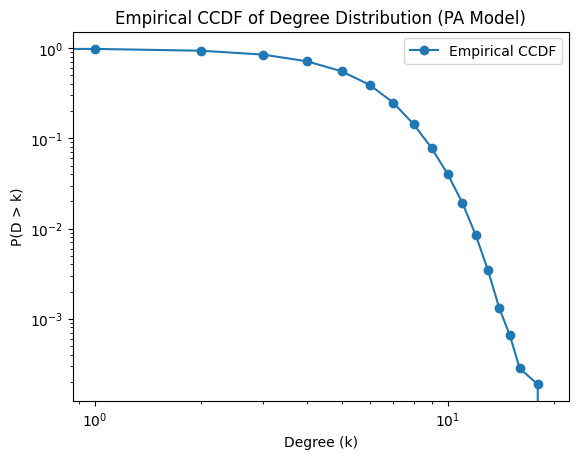

In [17]:
# A8. (6-8 lines)
# YOUR CODE HERE

ccdf = 1 - np.cumsum(prob)

# Plot CCDF on log-log scale
plt.loglog(deg, ccdf, marker="o", label="Empirical CCDF")

plt.xlabel("Degree (k)")
plt.ylabel("P(D > k)")
plt.title("Empirical CCDF of Degree Distribution (PA Model)")
plt.legend()
plt.show()

Next we generate a plot where the function decreases exponentially (e.g., $y = \exp(-x)$ and use the log-log scale, as you did above. (Does the plot look like a straight line? Which function decreases faster?)

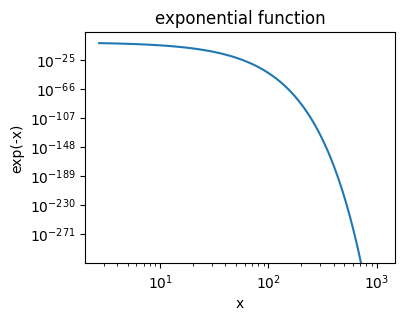

In [18]:
x = np.exp(np.linspace(1, 7, 100))
y = np.exp(-x)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(x,y)
ax.set_title("exponential function")
ax.set_ylabel(r"exp(-x)")
ax.set_xlabel("x")
ax.set_xscale('log')
ax.set_yscale('log')

Q9. [ISU STUDENTS ONLY] The following code shows, when adding a new node in the PA model, how to sample the nodes to connect the new edges.

The idea is that nodes should be sampled in proportion to their degrees. Suppose the network have 3 nodes, indexed from 'A' to 'C'. We denote the degree of node $v$ by $d(v)$.

By creating a list containing $d(v)$ copies of each node $v \in V$ and sampling from that list uniformly at random, the probability of sampling a node $u$ will be $d(u) / \sum_{v \in V} d(v)$.

In [19]:
def create_list_node_labels(node_labels, degrees):
  return [label for label, degree in zip(node_labels, degrees) for _ in range(degree)]

node_labels = ['A', 'B', 'C']
degrees = [3, 2, 4]

result = create_list_node_labels(node_labels, degrees)
print(result)

['A', 'A', 'A', 'B', 'B', 'C', 'C', 'C', 'C']


(a) [ISU STUDENTS ONLY] Show how to sample $m$ nodes from that list. Save the result in variable `sampled_nodes`. It is fine to have parallel edges.

In [20]:
m = 2

In [ ]:
# A9a. (1 line)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print(sampled_nodes)

(b) [ISU STUDENTS ONLY] Show how to update the list `result` based on the sampled nodes without recreating the list from scratch.

In [ ]:
# A9b. (1 line)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print(result)

## The Small World model

The Small World model a.k.a. Watts-Strogatz model - has three parameters:
- number of nodes $n$
- number of nearest neighbors $k$ to which a node is joined
- probability of rewiring $p$

There is a range of values $p$ that can lead to both:
- high clustering
- short distances

We will generate a few networks from the Small World model. Next, we will compute distances and the clustering for each network.

Q10. Generate networks from the WS model using $n=10697$ and $k=6$ while varying $p$ in $\{10^{-3}, 10^{-2}, 10^{-1}\}$.

In [21]:
n=10697

p_list = [1e-3, 1e-2, 1e-1]
n = 10697
k = 2*3

G_list = []
np.random.seed(4099)

In [22]:
# A10. (~1-3 lines)
# YOUR CODE HERE
G_list = [nx.watts_strogatz_graph(n, k, p, seed=4099) for p in p_list]

Q11. Compute the (i) average clustering coefficient `avg_clust` for each graph and the (ii) density `density` of any of the three graphs.

Think about whether it matters which graph you pick.

In [23]:
avg_clust = []

In [24]:
def get_approx_avg_dist(G, nsample=100):
  nbunch = np.random.choice(list(G.nodes()), nsample, replace=False)
  all_dist = []
  for src in nbunch:
    # compute shortest paths lengths from src to all reachable nodes
    paths = nx.shortest_path_length(G, src)
    all_dist += paths.values()

  return np.mean(all_dist)

In [25]:
# A11. (2-3 lines)
# YOUR CODE HERE
avg_clust = [nx.average_clustering(G) for G in G_list]

density = nx.density(G_list[0])

In [26]:
for p, avg_clust in zip(p_list, avg_clust):
  print(f"p = {p:.1e}, avg_clust = {avg_clust:.3e}")
print(f'Density: {density:.3e}')

p = 1.0e-03, avg_clust = 5.985e-01
p = 1.0e-02, avg_clust = 5.833e-01
p = 1.0e-01, avg_clust = 4.435e-01
Density: 5.610e-04


Q12. Based on the above, can we conclude that some of these networks have high clustering (compared with, for example, a G(n,p) model? (2 sentences)

Yes, the WS model graphs with low p values show high clustering much higher then G(n, p) model, which usually have very low clustering. As p increase, clustering decrease but it still stays higher than in random graphs, meaning WS network can keep high clustering while also having shorter distances.

Q13. [ISU STUDENTS ONLY] Knowing that the average distance in these examples is, respectively, $\approx 155$, $\approx 27$ and $\approx 9$, does any of these graphs possess both the clustering and distance properties we were trying to achieve? If so, which one? Why? (~2 sentences).

YOUR ANSWER HERE

# Clustering and Community Detection (3 questions)

In this problem, we will use networkx to create a 16-node graph and run the Louvain algorithm for detecting communities.

Q1. Use networkx functions to create the graph a graph $G$ shown in the picture below, consisting of 4 cliques of 4 nodes each, arranged in a ring.



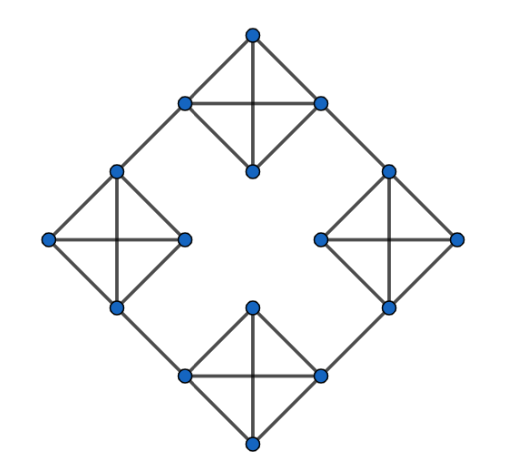

HINT 1: Build cliques of 4 nodes and use `nx.relabel_nodes` before you add edges from the clique to the graph.

HINT 2: All the nodes in a clique are identical until you choose which two nodes will connect to other cliques. Hence, you can choose any two nodes.

HINT 3: There are only 4 connections between cliques. It is easier to think that each clique connects to the "next" one (in a cycle).

In [27]:
import networkx as nx

In [28]:
# A1. (~7-10 lines)
# YOUR CODE HERE
G = nx.Graph()

# Create 4 cliques of 4 nodes each and relabel them uniquely
cliques = []
for i in range(4):
    clique = nx.complete_graph(4)
    mapping = {j: i * 4 + j for j in range(4)}
    clique = nx.relabel_nodes(clique, mapping)
    cliques.append(clique)

    G.add_nodes_from(clique.nodes)
    G.add_edges_from(clique.edges)

connections = [
    (3, 4),   
    (7, 8),   
    (11, 12), 
    (15, 0)   
]

G.add_edges_from(connections)

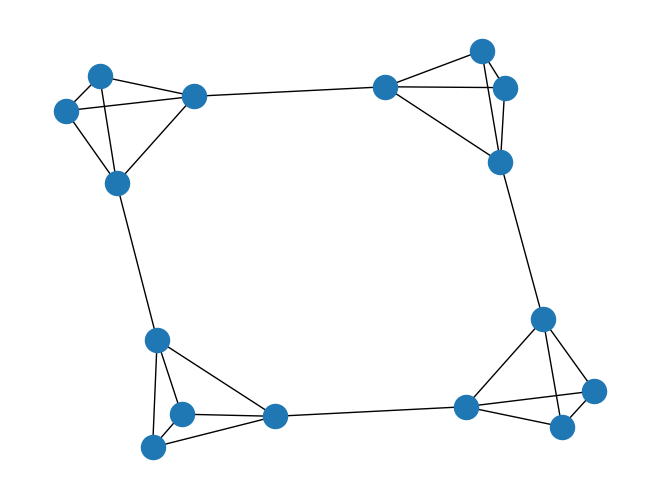

In [29]:
nx.draw(G)

Q2. Run the Louvain algorithm on this network.

In [30]:
# A2. (1 line)
# YOUR CODE HERE
comms = list(nx.community.greedy_modularity_communities(G))

In [31]:
print(comms)

[frozenset({0, 1, 2, 3}), frozenset({4, 5, 6, 7}), frozenset({8, 9, 10, 11}), frozenset({12, 13, 14, 15})]


We can plot the graph now using different colors for each community.

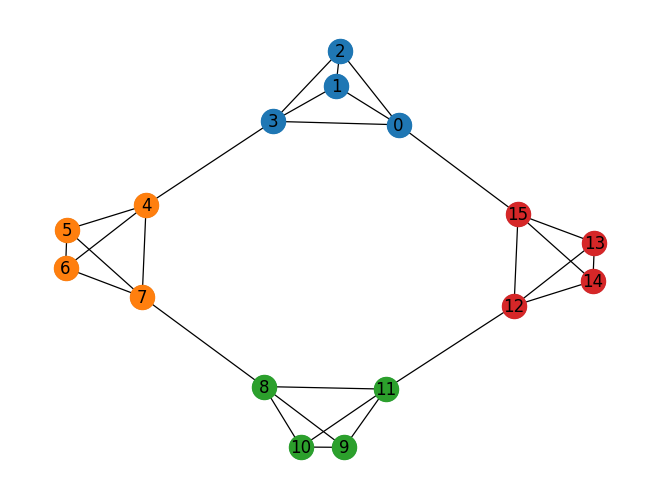

In [33]:
pos = nx.spring_layout(G) #calculate position for each node
# pos is needed because we are going to draw a few nodes at a time,
# pos fixes their positions.

# Notice that the pos dict is passed to each call to draw below

# Draw the graph, but don't color the nodes
nx.draw(G, pos, edge_color='k',  with_labels=True,
         font_weight='light', node_size= 280, width= 0.9)

#For each community list, draw the nodes, giving it a specific color.
for idx, node_lists_community in enumerate(comms):
  nx.draw_networkx_nodes(G, pos, nodelist=node_lists_community, node_color=f'C{idx}')

Q3. Now consider a larger version of the same network, with 32 cliques of 4 nodes each (arranged in a ring as earlier); call this network Gbig. Again, assume all the edges have same weight value 1, and there exists exactly one edge between any two adjacent cliques. The first phase of modularity optimization, as expected, detects each clique as a single community. After aggregation, this forms a new network Hbig with 32 nodes.

Your task is to generate network Gbig, then return the results obtained when running a single iteration of Phase 1 from the Louvain Algorithm. You can use the method implemented in `networkx`. Check which additional parameters you need to use.

In [34]:
# A3. (2 lines, if you write the graph generation as a function)
# YOUR CODE HERE
import networkx as nx

# Step 1: Generate Gbig (32 cliques of 4 nodes each, arranged in a ring)
def generate_gbig():
    Gbig = nx.Graph()
    num_cliques = 32  # Total cliques
    clique_size = 4  # Each clique has 4 nodes

    # Step 1: Create 32 cliques
    cliques = []
    for i in range(num_cliques):
        clique = nx.complete_graph(clique_size)  # Create a clique
        mapping = {j: i * clique_size + j for j in range(clique_size)}  # Relabel uniquely
        clique = nx.relabel_nodes(clique, mapping)
        cliques.append(clique)
        Gbig.add_nodes_from(clique.nodes)
        Gbig.add_edges_from(clique.edges)

    # Step 2: Connect each clique to the next in a ring
    for i in range(num_cliques):
        Gbig.add_edge(i * clique_size + (clique_size - 1), (i + 1) % num_cliques * clique_size)

    return Gbig

# Step 3: Run Phase 1 of Louvain Algorithm
Gbig = generate_gbig()
communities_phase1 = nx.community.louvain_communities(Gbig, resolution=1, weight='weight')

# Output the detected communities after Phase 1
for i, community in enumerate(communities_phase1):
    print(f"Community {i+1}: {sorted(community)}")

Community 1: [0, 1, 2, 3, 4, 5, 6, 7]
Community 2: [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Community 3: [20, 21, 22, 23, 24, 25, 26, 27]
Community 4: [28, 29, 30, 31, 32, 33, 34, 35]
Community 5: [36, 37, 38, 39, 40, 41, 42, 43]
Community 6: [44, 45, 46, 47, 48, 49, 50, 51]
Community 7: [52, 53, 54, 55, 56, 57, 58, 59]
Community 8: [60, 61, 62, 63, 64, 65, 66, 67]
Community 9: [68, 69, 70, 71, 72, 73, 74, 75]
Community 10: [76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
Community 11: [88, 89, 90, 91, 92, 93, 94, 95]
Community 12: [96, 97, 98, 99, 100, 101, 102, 103]
Community 13: [104, 105, 106, 107, 108, 109, 110, 111]
Community 14: [112, 113, 114, 115, 116, 117, 118, 119]
Community 15: [120, 121, 122, 123, 124, 125, 126, 127]


# Random Walk & PageRank (6 questions + 4 ISU only)

We saw in class that a random walk on a graph is a stochastic process that uses the structure to determine the order in which nodes are visited.

The simplest random walk is sometimes called the uniform random walk since it chooses the next node to visit uniformly at random from the set of neighbors of the current node.

In [35]:
# load Zachary's karate club network
G = nx.karate_club_graph()

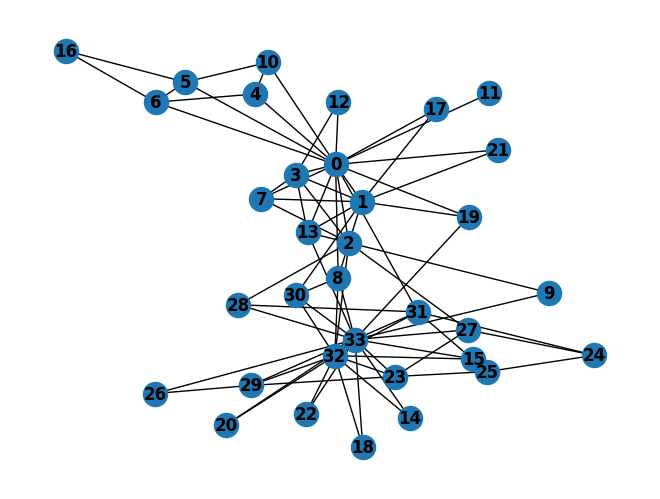

In [36]:
# plot G with node labels
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')

We saw that the random walk is an **ergodic** Markov Chain (i.e., will converge to a unique steady state solution) if and only if the graph satisfies two conditions.

Q1. Use the graph visualization above to argue that the karate club network satisfies the two conditions. (~2-4 sentences)

- Irreducibility: The Markov Convergence Theorem states that a Markov Chain must be irreducible, meaning every state (node) is accessible from any other. The karate club network is a single connected component, meaning a random walker can eventually reach any node from any other node. 
- Aperiodicity: A Markov Chain is aperiodic if it does not get trapped in cycles of fixed length. The karate club network is not bipartite, as it contains nodes with different path lengths and varying degrees, breaking rigid periodic cycles.

The following code implements a uniform random walk from scratch.

In [37]:
def random_walk(G, start_node, num_steps):
  current_node = start_node
  for step in range(num_steps):
    neighbors = list(G.neighbors(current_node))
    next_node = np.random.choice(neighbors)
    yield next_node
    current_node = next_node

Below we run a random walk for $T=1000$ steps, starting from a node chosen uniformly at random.

In [38]:
np.random.seed(4099)
T = 1000

# select initial node (seed)
seed_node = np.random.choice(G.nodes())
visited = list(random_walk(G, seed_node, T))

# print seed and first 10 visited nodes
print(f'initial_node: {seed_node}')
print(visited[:10])

initial_node: 23
[np.int64(25), np.int64(31), np.int64(33), np.int64(29), np.int64(26), np.int64(33), np.int64(22), np.int64(32), np.int64(18), np.int64(33)]


Q2. Use bar plots to indicate the fraction of visits the RW makes to each node (the x-axis should be the node label). On the same plot, add points to show the expected value based on the steady state distribution:
$$
\pi_x = \frac{\textrm{deg}(x)}{2M}.
$$

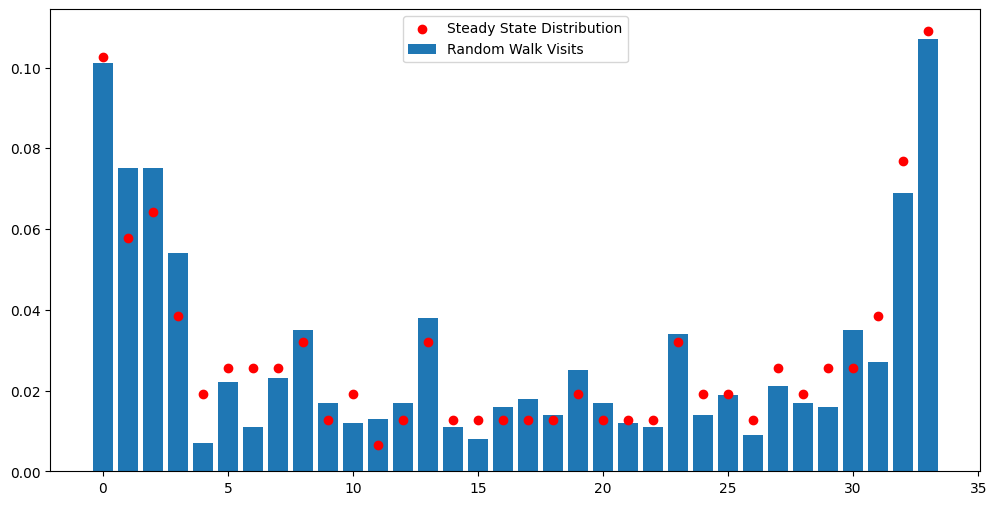

In [39]:
# A2. (10+ lines)
# YOUR CODE HERE
visit_counts = {node: visited.count(node) / T for node in G.nodes()}

M = G.number_of_edges()
steady_state = {node: G.degree[node] / (2 * M) for node in G.nodes()}

plt.figure(figsize=(12, 6))
plt.bar(visit_counts.keys(), visit_counts.values(), label="Random Walk Visits")
plt.scatter(steady_state.keys(), steady_state.values(), color='red', label="Steady State Distribution")
plt.legend()
plt.show()


Q3. [ISU STUDENTS ONLY] Do you expect to get very different results for the blue bars starting from a different node? Why? (~2 sentences).

Hint: It is OK to try this out and conclude something based on the results, but you don't have to.

YOUR ANSWER HERE

Now we will consider a different network, define the transition probability $P$ and use it for iterating an initial state until convergence.

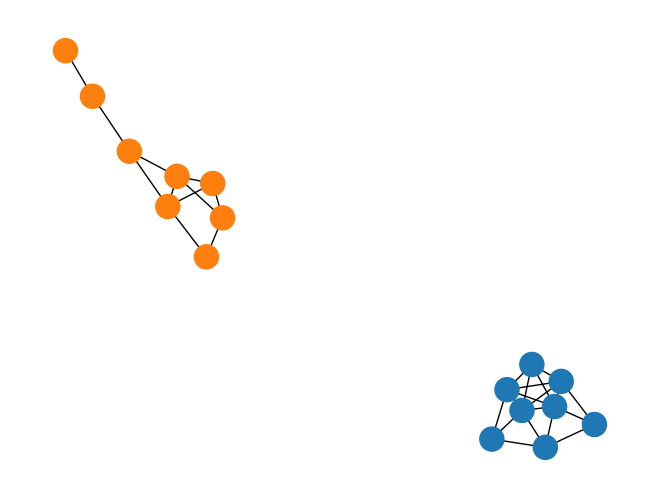

In [40]:
nodes_per_component = 8
sizes = [nodes_per_component, nodes_per_component]
probs = [[.6, .0],[.0, .5]]
G = nx.stochastic_block_model(sizes, probs, seed=4099)

nx.draw(G, node_color=['C0']*nodes_per_component+['C1']*nodes_per_component)

Q4. Determine the transition probability matrix $P$ for a random walk, where $P_{ji}$ is the probability of transitioning from $i$ to $j$.

Hint: Think whether you need to normalize the rows or the columns.

In [ ]:
# A4. (~2-4 lines)
# YOUR CODE HERE
import pandas as pd

num_nodes = len(G.nodes)
P = np.zeros((num_nodes, num_nodes))

for i in G.nodes:
    neighbors = list(G.neighbors(i))
    if neighbors:
        P[i, neighbors] = 1 / len(neighbors)

P_df = pd.DataFrame(P, index=G.nodes, columns=G.nodes)

print(P_df.head(10))



         0         1         2         3         4         5         6   \
0  0.000000  0.200000  0.200000  0.200000  0.000000  0.200000  0.000000   
1  0.166667  0.000000  0.166667  0.166667  0.166667  0.166667  0.000000   
2  0.250000  0.250000  0.000000  0.250000  0.000000  0.250000  0.000000   
3  0.200000  0.200000  0.200000  0.000000  0.000000  0.200000  0.200000   
4  0.000000  0.250000  0.000000  0.000000  0.000000  0.250000  0.250000   
5  0.166667  0.166667  0.166667  0.166667  0.166667  0.000000  0.166667   
6  0.000000  0.000000  0.000000  0.333333  0.333333  0.333333  0.000000   
7  0.333333  0.333333  0.000000  0.000000  0.333333  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         7    8    9         10   11        12        13        14        15  
0  0.200000  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  
1  0.166667  0.0

In [43]:
print(np.round(P,1))

[[0.  0.2 0.2 0.2 0.  0.2 0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.  0.2 0.2 0.2 0.2 0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.  0.2 0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.  0.  0.2 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0.  0.2 0.2 0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.3 0.3 0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.3 0.3 0.  0.  0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.3 0.  0.3]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.3 0.3 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.2 0.2 0.2 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.2 0.2 0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.3 0.  0.  0.3 0.  

Q5. Now we will use $P$ to obtain the state probabilities $\pi_t$ for $t=1,\ldots$ starting from a single node.

(a) First, you will define $\pi_0$ (i.e., the distribution at time $t=0$) so that the random walk will necessarily start from node $3$ (indexes start from 0).

In [51]:
# A5a. (~2 lines)
# YOUR CODE HERE
num_nodes = len(G.nodes)

# Initialize π_0 with all zeros
pi = np.zeros(num_nodes)

# Set probability of starting at node 3 to 1
pi[3] = 1.0

# Convert to DataFrame for display
pi_0_df = pd.DataFrame(pi, index=G.nodes, columns=["pi"])

In [53]:
print(pi)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(b) Define a function `compute_state_distribution(P, pi, T)` that takes as input the initial state distribution `pi` and iterates `T` times using matrix `P`.

Perform $T = 10$ iterations from $\pi_0$ determine $\pi_{10}$.

PRO TIP: To avoid issues with numpy's broadcasting, make $\pi$ a 2D array of shape (n,1).

In [54]:
T = 10

In [55]:
# A5b. (~6 lines)
# YOUR CODE HERE
def compute_state_distribution(P, pi, T):
    pi_t = pi.reshape(-1, 1) 
    for _ in range(T):
        pi_t = P.T @ pi_t  
    
    return pi_t

pi = compute_state_distribution(P, pi, T)

In [56]:
print(pi)

[[0.13889477]
 [0.16655669]
 [0.11108035]
 [0.13903902]
 [0.11126516]
 [0.16668429]
 [0.08318518]
 [0.08329455]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


(c) Now compute $\pi_{10}$, but this time start the random walk from node 15.

In [57]:
# YOUR CODE HERE
pi = np.zeros(num_nodes)
pi[15] = 1.0 

pi = compute_state_distribution(P, pi, T)

In [58]:
print(pi)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.08296712]
 [0.12666983]
 [0.204094  ]
 [0.01561981]
 [0.06729303]
 [0.19086445]
 [0.10265697]
 [0.20983479]]


(d) Is the steady state distribution unique, regardless of the initial node? Why? (~2 sentences)

No, the steady-state distribution is not unique in this case because the graph consists of two disconnected components. Since a random walker cannot move between these components, the steady-state distribution depends on the initial node's component—if the walk starts in one component, it will never reach nodes in the other.

Q6. [ISU STUDENTS ONLY] Modify $P$ so that this new RW:
* behaves as the uniform RW with probability 0.6,
* transitions to node 0 with probability 0.2,
* transitions to node 8 with probability 0.2;

HINT 1: note that $P_{0,i}$ will be larger than 0.2 if $i$ is connected to 0. (The same is true for node 8).

HINT 2: make sure that you have valid probability distributions.

In [ ]:
# A6. (~3-4 lines)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print(P[0,1])

Now we use the PageRank algorithm to rank not pages, but [Wikipedia editors](http://snap.stanford.edu/data/wiki-Vote.html) based on how they vote on each other.

Q7. Download the Wikipedia vote network, load it using networkx and run the PageRank algorithm from the library.

HINT 1: You can use library `urllib` to download the dataset from http://snap.stanford.edu/data/wiki-Vote.txt.gz. Check function `urllib.request.urlretrieve`.

HINT 2: networkx has a function that allows you to read edgelists without uncompressing the file.

HINT 3: make sure that you are reading it as a directed graph.

In [63]:
# A7. (~2-3 lines)
# YOUR CODE HERE
import urllib.request
import gzip
import networkx as nx
import pandas as pd

url = "http://snap.stanford.edu/data/wiki-Vote.txt.gz"
file_path, _ = urllib.request.urlretrieve(url)

with gzip.open(file_path, "rt", encoding="utf-8") as f:
    G = nx.read_edgelist(f, create_using=nx.DiGraph(), comments='#')

pagerank_scores = nx.pagerank(G)
print(pagerank_scores)


{'30': 0.00017349553934328338, '1412': 0.0008141761230496596, '3352': 0.0017851250122027217, '5254': 0.0021500675059293226, '5543': 0.0010508052619841283, '7478': 0.000812430352613478, '3': 0.00020539498232448021, '28': 0.0016986730322136935, '39': 0.0003439790689580259, '54': 0.00034765464971898025, '108': 0.0004398371153454517, '152': 0.0005817197428805889, '178': 0.00029758488331950184, '182': 0.00016083873728146714, '214': 0.0016599199669365457, '271': 0.0013349240914416604, '286': 0.00017367757770305088, '300': 0.00015065607046072744, '348': 0.00017393564565284635, '349': 9.460415271381966e-05, '371': 0.0002892903392357495, '567': 0.00033152691295165287, '581': 0.00010905154270480289, '584': 0.00022615441013923313, '586': 0.00010518825019481072, '590': 0.00019458075864204938, '604': 0.00018151640169193398, '611': 0.0002164090559846353, '8283': 0.0003287923832617068, '25': 5.0487823458630175e-05, '6': 0.00031183250978437466, '8': 0.00032663557615950425, '19': 0.00013112179292607275

In [64]:
print(G.number_of_nodes())
print(G.number_of_edges())

7115
103689


Q8. Run the pagerank algorithm setting the probability of teleporting to 0.2, then determine the highest ranked editor.

In [ ]:
top_ranked_editor = None

In [ ]:
# A8. (~2-4 lines)
# YOUR CODE HERE
pagerank_scores_teleport = nx.pagerank(G, alpha=0.8)

top_ranked_editor = max(pagerank_scores_teleport, key=pagerank_scores_teleport.get)

top_ranked_editor_df = pd.DataFrame([[top_ranked_editor, pagerank_scores_teleport[top_ranked_editor]]], 
                                    columns=["Top Ranked Editor", "PageRank Score"])
top_ranked_editor_df


,Top Ranked Editor,PageRank Score
0,4037,0.004519


In [66]:
print(f"The top ranked editor is: {top_ranked_editor}")

The top ranked editor is: 4037


Side note: in reality, some of the votes are neutral or negative. The 'sign' of the vote would have to be factored in to get a more accurate ranking.

The PageRank algorithm can slightly modified in order to compute the relative importance of other nodes for a given node $v$. The only change required is to force all teleportations to go back to node $v$.

The ranking is then determined by the fraction of times a node was visited (the more times, the more important).

Q9. [ISU STUDENTS ONLY] Starting from the implementation of the function `random_walk` provided above, add the teleportation step to implement `custom_pagerank`.

HINT: If the current_node has no outgoing neighbors, the walker MUST teleport.

In [ ]:
np.random.seed(4099)

In [ ]:
# A9. (~3-4 new lines)
# YOUR CODE HERE
raise NotImplementedError()

Q10. [ISU STUDENTS ONLY] Use your code to find the 10 `most_important_editors` from the perspective of editor '4037' (label is a string!). Use a teleportation probability of 0.5.

Note: The page rank seems to take a really long time to converge in this case. As long as your answer contains one of the top 10 from our answers, it will be considered correct.

HINT: If you are using `Counter`, making the labels and counts as separate `np.arrays` is a good idea if you plan to slice them later. For instance:

`labels = np.array(list(counter.keys()))`

`counts = np.array(list(counter.values()))`


In [ ]:
start_node = '4037'
teleport_prob = 0.5
most_important_editors = []

In [ ]:
# A10. (~8 lines)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print(f'Most important editors relative to {start_node}:\n{most_important_editors}')